## MySQL에서 데이터 로드 

In [ ]:
#pip install pymysql

In [57]:
#pip install seaborn

In [93]:
import pymysql
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [94]:
# MySQL 연결 정보
DB_HOST = "15.168.145.74" 
DB_USER = "lab08"  
DB_PASSWORD = "Multi1234!" 
DB_NAME = "my_db" 

In [95]:
# MySQL에서 데이터 가져오기
conn = pymysql.connect(host=DB_HOST, user=DB_USER, password=DB_PASSWORD, database=DB_NAME)
car_siren = f"SELECT * FROM merge_car_siren"
car_horn = f"SELECT * FROM merge_car_horn"
car_driving = f'SELECT * FROM merge_car_driving_sound'
motorcycle_horn  = f'SELECT * FROM merge_motorcycle_horn'
motorcycle_driving  = f'SELECT * FROM merge_motorcycle_driving_sound'

car_siren_df =  pd.read_sql(car_siren, conn)
car_horn_df = pd.read_sql(car_horn, conn) 
car_driving_df = pd.read_sql(car_driving, conn) 
motorcycle_horn_df= pd.read_sql(motorcycle_horn, conn) 
motorcycle_driving_df = pd.read_sql(motorcycle_driving, conn) 

conn.close()

/tmp/ipykernel_4901/1700635407.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_siren_df =  pd.read_sql(car_siren, conn)
/tmp/ipykernel_4901/1700635407.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_horn_df = pd.read_sql(car_horn, conn)
/tmp/ipykernel_4901/1700635407.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_driving_df = pd.read_sql(car_driving, conn)
/tmp/ipykernel_4901/1700635407.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sq

# EDA 및 전처리

In [96]:
print(f'car_siren 데이터 개수: {car_siren_df.shape[0]}')
print(f'car_horn 데이터 개수: {car_horn_df.shape[0]}')
print(f'car_driving 데이터 개수: {car_driving_df.shape[0]}')
print(f'motorcycle_horn 데이터 개수: {motorcycle_horn_df.shape[0]}')
print(f'motorcycle_driving 데이터 개수: {motorcycle_driving_df.shape[0]}')

car_siren 데이터 개수: 1990
car_horn 데이터 개수: 3189
car_driving 데이터 개수: 1682
motorcycle_horn 데이터 개수: 4560
motorcycle_driving 데이터 개수: 4735


In [97]:
car_horn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fileName       3189 non-null   object 
 1   labelName      3189 non-null   object 
 2   area_start     3189 non-null   float64
 3   area_end       3189 non-null   float64
 4   category_01    3189 non-null   object 
 5   category_02    3189 non-null   object 
 6   category_03    3189 non-null   object 
 7   decibel        3189 non-null   int64  
 8   soundQuality   3189 non-null   object 
 9   subCategory    3189 non-null   object 
 10  bitRate        3189 non-null   object 
 11  duration       3189 non-null   float64
 12  fileFormat     3189 non-null   object 
 13  fileSize       3189 non-null   int64  
 14  recodingType   3189 non-null   object 
 15  sampleRate     3189 non-null   object 
 16  acqDevice      3189 non-null   object 
 17  acqMethod      3189 non-null   object 
 18  acqType 

In [98]:
car_horn_df.head()

,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,1.car_horn_30849_1.wav,1.car_horn_30849_1.wav,2.0,11.048,교통소음,자동차,차량경적,68,정상,소형차경적,...,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,1.car_horn_30865_1.wav,1.car_horn_30865_1.wav,2.0,10.672,교통소음,자동차,차량경적,75,정상,소형차경적,...,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,1.car_horn_30869_1.wav,1.car_horn_30869_1.wav,2.0,12.245,교통소음,자동차,차량경적,68,정상,소형차경적,...,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,1.car_horn_30874_1.wav,1.car_horn_30874_1.wav,2.0,10.289,교통소음,자동차,차량경적,69,정상,소형차경적,...,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,1.car_horn_59_1.wav,1.car_horn_59_1.wav,2.0,4.029,교통소음,자동차,차량경적,107,정상,소형차경적,...,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720


In [99]:
car_horn_df.iloc[ : ,-13:] 

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,-328.99643,110.927765,13.474552,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,-380.94937,82.016785,-38.369390,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,-498.20813,114.061424,1.980113,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,-456.39767,111.490440,-6.244432,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,-199.50888,199.641110,-13.681638,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,-264.83923,197.210750,-77.277880,23.032236,11.380154,7.896886,11.269576,-4.560492,17.224950,4.160231,-1.057662,0.926013,-7.930759
3185,-426.90427,130.722400,47.745327,8.306962,5.675391,15.449170,5.677291,6.208929,-0.195498,-5.397255,-2.674880,-6.652485,-10.272819
3186,-316.11063,194.271060,-29.530697,35.808052,12.489090,23.182838,11.050718,3.705868,11.450807,-0.165664,2.353512,0.390641,5.358946
3187,-228.09323,64.343980,-13.663012,41.246460,-7.827433,21.293640,-13.415158,3.358162,5.326135,-3.165687,-11.261456,-1.512664,6.411310


In [100]:
#데이터프레임 병합 
df_combined = pd.concat([car_horn_df, car_siren_df,car_driving_df,motorcycle_horn_df,motorcycle_driving_df], ignore_index=True)

print(f'df_combined 행 개수: {len(df_combined)}') 
df_combined.head()

df_combined 행 개수: 16156


,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,1.car_horn_30849_1.wav,1.car_horn_30849_1.wav,2.0,11.048,교통소음,자동차,차량경적,68,정상,소형차경적,...,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,1.car_horn_30865_1.wav,1.car_horn_30865_1.wav,2.0,10.672,교통소음,자동차,차량경적,75,정상,소형차경적,...,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,1.car_horn_30869_1.wav,1.car_horn_30869_1.wav,2.0,12.245,교통소음,자동차,차량경적,68,정상,소형차경적,...,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,1.car_horn_30874_1.wav,1.car_horn_30874_1.wav,2.0,10.289,교통소음,자동차,차량경적,69,정상,소형차경적,...,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,1.car_horn_59_1.wav,1.car_horn_59_1.wav,2.0,4.029,교통소음,자동차,차량경적,107,정상,소형차경적,...,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720


In [101]:
df_combined.iloc[ : ,-13:] 

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,-328.99643,110.927765,13.474552,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,-380.94937,82.016785,-38.369390,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,-498.20813,114.061424,1.980113,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,-456.39767,111.490440,-6.244432,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,-199.50888,199.641110,-13.681638,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16151,-216.76335,227.552900,-82.289760,16.343384,-4.159147,-1.904160,10.840672,-6.094479,17.134110,-8.040121,-5.996139,-3.300848,-16.263510
16152,-260.36172,232.860840,-65.116700,39.084170,-3.065447,-7.736792,3.819775,-23.061602,6.557758,-13.926962,0.232121,0.180463,-9.043220
16153,-226.24818,233.032470,-56.155680,20.904785,-7.488766,-5.550318,1.841214,-16.429771,5.814109,-12.387865,-7.400935,-5.786819,-12.857692
16154,-200.10258,227.743970,-65.901590,5.604812,-13.910416,-17.113100,-6.478857,-20.236270,-2.118787,-16.228954,-6.787997,-3.972823,-13.148409


# 모델링

In [10]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # warning 메시지 숨기기

import tensorflow as tf
print("Is GPU available:", tf.test.is_gpu_available())

import tensorflow as tf
print('tf.__version__:',tf.__version__)

2025-02-21 09:31:48.052468: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-21 09:31:48.769843: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-21 09:31:50.540722: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available: True
tf.__version__: 2.13.0


2025-02-21 09:31:53.185272: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-21 09:31:53.294657: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-21 09:31:53.297539: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [11]:
tf.config.set_visible_devices([], 'GPU')

2025-02-21 09:31:55.222109: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-21 09:31:55.223653: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-21 09:31:55.225125: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [12]:
!nvidia-smi

Fri Feb 21 09:31:55 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   25C    P0    25W /  70W |    283MiB / 15360MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [119]:
# 레이블(label)과 피처(features) 분리
X = df_combined.iloc[ : ,-13:]  # 원하는 MFCC 열만 선택
y = df_combined['category_03']  #차량경적, 차량사이렌

In [120]:
# 범주형 데이터(레이블) 숫자로 변환
y = y.astype('category').cat.codes

In [121]:
# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
# X_train을 numpy 배열로 변환 후 reshape
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))

In [124]:
import random
import numpy as np

X_test = X_test.reset_index(drop=True)

# 테스트 데이터에서 샘플 선택
index = random.randint(0, len(X_test) - 1)
sample = X_test.iloc[index].values.reshape(1, X_test.shape[1], 1)  # CNN 입력 형태로 변환

# 예측 수행
prediction = model.predict(sample)
predicted_label = np.argmax(prediction)

print(f"실제 라벨: {y_test.iloc[index]}")

print(f"예측된 라벨: {predicted_label}")

1/1 [==============================] - 0s 16ms/step
실제 라벨: 0
예측된 라벨: 0


1. Conv1D(64, kernel_size=3, activation='relu') 
- 1D 합성곱 레이어로 특징을 추출\
- 64: 필터 개수 \
- kernel_size=3: 3개의 연속된 데이터를 보고 패턴을 학습 \
- activation='relu': 비선형 활성화 함수 사용 

2. MaxPooling1D(pool_size=2) : 피처 맵에서 가장 중요한 특징만 남기는 다운샘플링 


3. Flatten(): CNN 출력 결과를 1D 벡터로 변환하여 Dense 레이어로 전달 


4. Dense(64, activation='relu') 
- 완전연결층 (FC Layer) \
- 64개의 뉴런을 가지며 비선형 변환을 적용


5. Dense(num_classes, activation='softmax') 
- 출력층, num_classes만큼의 뉴런을 가지며 소프트맥스 함수 적용 \
- 다중 분류 문제 해결을 위해 사용 

6. 손실 함수 및 최적화
- loss='sparse_categorical_crossentropy':
레이블이 **정수(0,1,2,3...)**인 경우 사용
만약 원-핫 인코딩된 레이블이라면 'categorical_crossentropy'를 사용해야 함
- optimizer='adam':
가중치를 최적화하는 알고리즘
- metrics=['accuracy']:
정확도를 평가 지표로 사용

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# 클래스 수 (필요에 따라 수정)
num_classes = len(set(y))

model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
import time
start_time = time.time()

history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_test, y_test))

end_time = time.time()
total_time = end_time - start_time
total_minutes = total_time / 60  
print(f"총 학습 시간: {total_minutes:.2f}분")


Epoch 1/50
12924/12924 [==============================] - 24s 2ms/step - loss: 0.4491 - accuracy: 0.8314 - val_loss: 0.3230 - val_accuracy: 0.8772
Epoch 2/50
12924/12924 [==============================] - 24s 2ms/step - loss: 0.4508 - accuracy: 0.8271 - val_loss: 0.3222 - val_accuracy: 0.8738
Epoch 3/50
12924/12924 [==============================] - 24s 2ms/step - loss: 0.4590 - accuracy: 0.8251 - val_loss: 0.3227 - val_accuracy: 0.8750
Epoch 4/50
12924/12924 [==============================] - 24s 2ms/step - loss: 0.4479 - accuracy: 0.8309 - val_loss: 0.3233 - val_accuracy: 0.8744
Epoch 5/50
12924/12924 [==============================] - 24s 2ms/step - loss: 0.4478 - accuracy: 0.8309 - val_loss: 0.3239 - val_accuracy: 0.8784
Epoch 6/50
12924/12924 [==============================] - 24s 2ms/step - loss: 0.4446 - accuracy: 0.8299 - val_loss: 0.3244 - val_accuracy: 0.8762
Epoch 7/50
12924/12924 [==============================] - 24s 2ms/step - loss: 0.4455 - accuracy: 0.8292 - val_loss: 0

## 훈련 정확도와 검증 정확도 비교

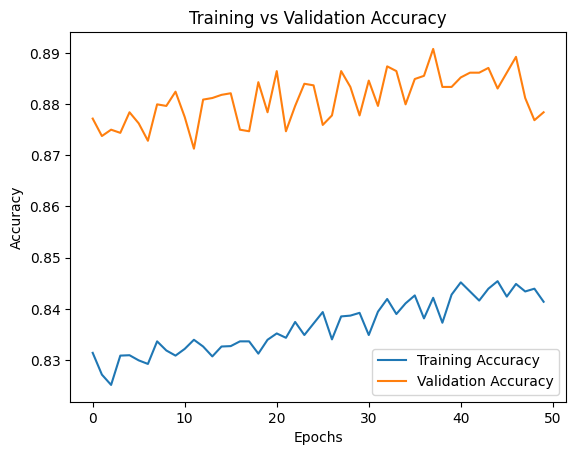

In [31]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [35]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"테스트 데이터 정확도: {test_acc:.4f}")


101/101 [==============================] - 0s 1ms/step - loss: 0.3099 - accuracy: 0.8784
테스트 데이터 정확도: 0.8784


## 혼동행렬

101/101 [==============================] - 0s 1ms/step


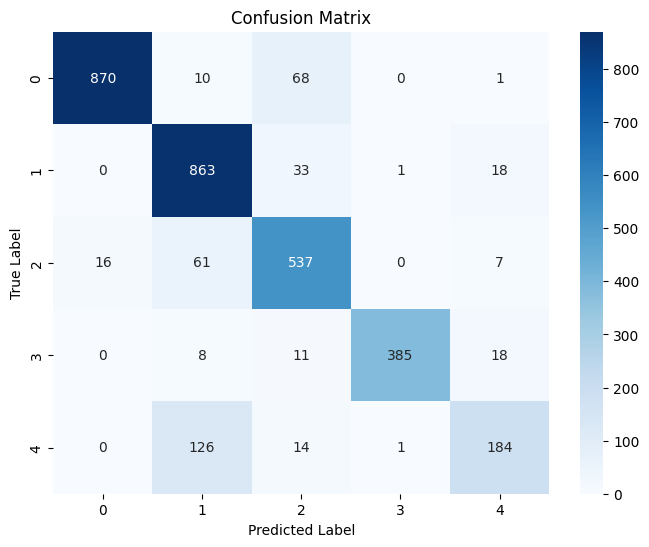

In [36]:
# 예측값 생성
y_pred = np.argmax(model.predict(X_test), axis=1)

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## precision, recall, f1-score

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       949
           1       0.81      0.94      0.87       915
           2       0.81      0.86      0.84       621
           3       0.99      0.91      0.95       422
           4       0.81      0.57      0.67       325

    accuracy                           0.88      3232
   macro avg       0.88      0.84      0.85      3232
weighted avg       0.88      0.88      0.88      3232



## 2차 모델링 테스트 - Early Stopping, ReduceLROnPlateau, Dropout 추가, batch_size 증가

In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import time

# 레이블(label)과 피처(features) 분리
X = df_combined.iloc[:, -13:]  # 원하는 MFCC 열만 선택
y = df_combined['category_03']  # 차량경적, 차량사이렌

# 범주형 데이터(레이블) 숫자로 변환
y = y.astype('category').cat.codes

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train을 numpy 배열로 변환 후 reshape
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# 클래스 수
num_classes = len(set(y))

# CNN 모델 생성
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),  # 과적합 방지를 위한 Dropout 추가
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),  # 추가 Dropout 적용
    Dense(num_classes, activation='softmax')
])

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 콜백 함수 설정 - EarlyStopping 과 ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# 모델 학습
start_time = time.time()

history = model.fit(
    X_train, y_train, 
    epochs=50, batch_size=64, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping, reduce_lr]
)

end_time = time.time()
total_minutes = (end_time - start_time) / 60  
print(f"총 학습 시간: {total_minutes:.2f}분")

Epoch 1/50
202/202 [==============================] - 1s 4ms/step - loss: 2.5228 - accuracy: 0.5203 - val_loss: 0.8302 - val_accuracy: 0.6937 - lr: 0.0010
Epoch 2/50
202/202 [==============================] - 1s 3ms/step - loss: 0.8973 - accuracy: 0.6511 - val_loss: 0.6722 - val_accuracy: 0.7317 - lr: 0.0010
Epoch 3/50
202/202 [==============================] - 1s 3ms/step - loss: 0.7615 - accuracy: 0.6998 - val_loss: 0.6020 - val_accuracy: 0.7744 - lr: 0.0010
Epoch 4/50
202/202 [==============================] - 1s 3ms/step - loss: 0.6889 - accuracy: 0.7266 - val_loss: 0.5447 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 5/50
202/202 [==============================] - 1s 3ms/step - loss: 0.6422 - accuracy: 0.7444 - val_loss: 0.4890 - val_accuracy: 0.8011 - lr: 0.0010
Epoch 6/50
202/202 [==============================] - 1s 3ms/step - loss: 0.6075 - accuracy: 0.7587 - val_loss: 0.4788 - val_accuracy: 0.8035 - lr: 0.0010
Epoch 7/50
202/202 [==============================] - 1s 3ms/step - lo

In [54]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"테스트 데이터 정확도: {test_acc:.4f}")

101/101 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.8858
테스트 데이터 정확도: 0.8858


In [55]:
# 모델 성능 평가
from sklearn.metrics import classification_report, confusion_matrix

# 예측 수행
y_pred = np.argmax(model.predict(X_test), axis=1)

# 혼동 행렬 및 정밀도-재현율 평가
print("혼동 행렬 (Confusion Matrix)")
print(confusion_matrix(y_test, y_pred))

print("\n정밀도(Precision) - 재현율(Recall) 분석")
print(classification_report(y_test, y_pred))

101/101 [==============================] - 0s 1ms/step
혼동 행렬 (Confusion Matrix)
[[870   7  71   0   1]
 [  1 836  35   1  42]
 [ 18  51 531   1  20]
 [  0   4  10 395  13]
 [  0  82   9   3 231]]

정밀도(Precision) - 재현율(Recall) 분석
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       949
           1       0.85      0.91      0.88       915
           2       0.81      0.86      0.83       621
           3       0.99      0.94      0.96       422
           4       0.75      0.71      0.73       325

    accuracy                           0.89      3232
   macro avg       0.88      0.87      0.87      3232
weighted avg       0.89      0.89      0.89      3232



## 3차 모델링 테스트 - 배치 정규화 (Batch Normalization) & 최적화 알고리즘 (Optimizer) & Conv1D 추가+증가 & epochs 증가

In [136]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import time

# 레이블(label)과 피처(features) 분리
X = df_combined.iloc[:, -13:]  # 원하는 MFCC 열만 선택
y = df_combined['category_03']  # 차량경적, 차량사이렌

# 범주형 데이터(레이블) 숫자로 변환
y = y.astype('category').cat.codes

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train을 numpy 배열로 변환 후 reshape
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# 클래스 수
num_classes = len(set(y))

# CNN 모델 생성
model = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),  # 배치 정규화 추가
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),  # 배치 정규화 추가
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Adam 옵티마이저 설정 (학습률: 0.001)
optimizer = Adam(learning_rate=0.001)

# 모델 컴파일
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 콜백 함수 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# 모델 학습
start_time = time.time()

history = model.fit(
    X_train, y_train, 
    epochs=50, batch_size=64, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping, reduce_lr]
)

end_time = time.time()
total_minutes = (end_time - start_time) / 60  
print(f"총 학습 시간: {total_minutes:.2f}분") 




Epoch 1/50
202/202 [==============================] - 2s 6ms/step - loss: 0.7503 - accuracy: 0.7080 - val_loss: 0.5543 - val_accuracy: 0.7837 - lr: 0.0010
Epoch 2/50
202/202 [==============================] - 1s 5ms/step - loss: 0.5534 - accuracy: 0.7831 - val_loss: 0.4231 - val_accuracy: 0.8369 - lr: 0.0010
Epoch 3/50
202/202 [==============================] - 1s 5ms/step - loss: 0.4971 - accuracy: 0.8049 - val_loss: 0.3754 - val_accuracy: 0.8583 - lr: 0.0010
Epoch 4/50
202/202 [==============================] - 1s 5ms/step - loss: 0.4740 - accuracy: 0.8201 - val_loss: 0.3507 - val_accuracy: 0.8710 - lr: 0.0010
Epoch 5/50
202/202 [==============================] - 1s 5ms/step - loss: 0.4429 - accuracy: 0.8296 - val_loss: 0.3417 - val_accuracy: 0.8735 - lr: 0.0010
Epoch 6/50
202/202 [==============================] - 1s 5ms/step - loss: 0.4194 - accuracy: 0.8395 - val_loss: 0.3469 - val_accuracy: 0.8657 - lr: 0.0010
Epoch 7/50
202/202 [==============================] - 1s 5ms/step - lo

In [137]:
# 테스트 데이터 정확도 출력
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"테스트 데이터 정확도: {test_acc:.4f}")

101/101 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.9112
테스트 데이터 정확도: 0.9112


In [138]:
# 예측 수행
y_pred = np.argmax(model.predict(X_test), axis=1)

# 혼동 행렬 및 정밀도-재현율 평가
from sklearn.metrics import classification_report, confusion_matrix
print("혼동 행렬 (Confusion Matrix)")
print(confusion_matrix(y_test, y_pred))

print("\n정밀도(Precision) - 재현율(Recall) 분석")
print(classification_report(y_test, y_pred))

101/101 [==============================] - 0s 1ms/step
혼동 행렬 (Confusion Matrix)
[[880   5  63   0   1]
 [  1 829  37   2  46]
 [ 11  34 564   2  10]
 [  1   6   8 397  10]
 [  1  38   9   2 275]]

정밀도(Precision) - 재현율(Recall) 분석
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       949
           1       0.91      0.91      0.91       915
           2       0.83      0.91      0.87       621
           3       0.99      0.94      0.96       422
           4       0.80      0.85      0.82       325

    accuracy                           0.91      3232
   macro avg       0.90      0.91      0.90      3232
weighted avg       0.91      0.91      0.91      3232



## 4차 모델링 테스트 - StandardScaler() 적용, epochs 증가

In [160]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # StandardScaler 추가
import time

# 레이블(label)과 피처(features) 분리
X = df_combined.iloc[:, -13:]  # 원하는 MFCC 열만 선택
y = df_combined['category_03']  # 차량경적, 차량사이렌

# 범주형 데이터(레이블) 숫자로 변환
y = y.astype('category').cat.codes

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler를 사용하여 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # 학습 데이터에 맞게 스케일링
X_test = scaler.transform(X_test)        # 테스트 데이터는 학습 데이터로 변환된 스케일링 적용

# X_train을 numpy 배열로 변환 후 reshape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 클래스 수
num_classes = len(set(y))

# CNN 모델 생성
model = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
   
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Adam 옵티마이저 설정 (학습률: 0.001)
optimizer = Adam(learning_rate=0.001)

# 모델 컴파일
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 콜백 함수 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# 모델 학습
start_time = time.time()

history = model.fit(
    X_train, y_train, 
    epochs=150, batch_size=64, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping, reduce_lr]
)

end_time = time.time()
total_minutes = (end_time - start_time) / 60  
print(f"총 학습 시간: {total_minutes:.2f}분")


Epoch 1/150
202/202 [==============================] - 2s 5ms/step - loss: 0.8201 - accuracy: 0.6885 - val_loss: 1.1543 - val_accuracy: 0.4904 - lr: 0.0010
Epoch 2/150
202/202 [==============================] - 1s 5ms/step - loss: 0.5819 - accuracy: 0.7773 - val_loss: 0.5592 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 3/150
202/202 [==============================] - 1s 5ms/step - loss: 0.5221 - accuracy: 0.8039 - val_loss: 0.3693 - val_accuracy: 0.8679 - lr: 0.0010
Epoch 4/150
202/202 [==============================] - 1s 5ms/step - loss: 0.4787 - accuracy: 0.8186 - val_loss: 0.3516 - val_accuracy: 0.8725 - lr: 0.0010
Epoch 5/150
202/202 [==============================] - 1s 5ms/step - loss: 0.4577 - accuracy: 0.8231 - val_loss: 0.3445 - val_accuracy: 0.8682 - lr: 0.0010
Epoch 6/150
202/202 [==============================] - 1s 5ms/step - loss: 0.4469 - accuracy: 0.8328 - val_loss: 0.3272 - val_accuracy: 0.8759 - lr: 0.0010
Epoch 7/150
202/202 [==============================] - 1s 5ms/st

Epoch 53/150
202/202 [==============================] - 1s 5ms/step - loss: 0.2735 - accuracy: 0.8965 - val_loss: 0.2256 - val_accuracy: 0.9140 - lr: 1.0000e-04
Epoch 54/150
202/202 [==============================] - 1s 5ms/step - loss: 0.2735 - accuracy: 0.9002 - val_loss: 0.2248 - val_accuracy: 0.9155 - lr: 1.0000e-04
Epoch 55/150
202/202 [==============================] - 1s 5ms/step - loss: 0.2630 - accuracy: 0.9027 - val_loss: 0.2274 - val_accuracy: 0.9124 - lr: 1.0000e-04
Epoch 56/150
202/202 [==============================] - 1s 5ms/step - loss: 0.2719 - accuracy: 0.8978 - val_loss: 0.2258 - val_accuracy: 0.9137 - lr: 1.0000e-04
Epoch 57/150
202/202 [==============================] - 1s 5ms/step - loss: 0.2687 - accuracy: 0.9006 - val_loss: 0.2253 - val_accuracy: 0.9146 - lr: 1.0000e-04
Epoch 58/150
202/202 [==============================] - 1s 5ms/step - loss: 0.2703 - accuracy: 0.9010 - val_loss: 0.2253 - val_accuracy: 0.9127 - lr: 1.0000e-04
Epoch 59/150
202/202 [============

In [161]:
# 테스트 데이터 정확도 출력
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"테스트 데이터 정확도: {test_acc:.4f}")

101/101 [==============================] - 0s 2ms/step - loss: 0.2237 - accuracy: 0.9149
테스트 데이터 정확도: 0.9149


In [162]:
# 예측 수행
y_pred = np.argmax(model.predict(X_test), axis=1)

# 혼동 행렬 및 정밀도-재현율 평가
from sklearn.metrics import classification_report, confusion_matrix
print("혼동 행렬 (Confusion Matrix)")
print(confusion_matrix(y_test, y_pred))

print("\n정밀도(Precision) - 재현율(Recall) 분석")
print(classification_report(y_test, y_pred))

101/101 [==============================] - 0s 1ms/step
혼동 행렬 (Confusion Matrix)
[[889   5  54   0   1]
 [  2 833  30   5  45]
 [ 19  32 558   3   9]
 [  2   6   5 400   9]
 [  0  40   7   1 277]]

정밀도(Precision) - 재현율(Recall) 분석
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       949
           1       0.91      0.91      0.91       915
           2       0.85      0.90      0.88       621
           3       0.98      0.95      0.96       422
           4       0.81      0.85      0.83       325

    accuracy                           0.91      3232
   macro avg       0.91      0.91      0.91      3232
weighted avg       0.92      0.91      0.92      3232



## 5차 모델링 - 하이퍼파라미터 튜닝 (Hyperparameter Tuning)

In [165]:
#!pip install scikeras

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import time

# 레이블(label)과 피처(features) 분리
X = df_combined.iloc[:, -13:]  # 원하는 MFCC 열만 선택
y = df_combined['category_03']  # 차량경적, 차량사이렌

# 범주형 데이터(레이블) 숫자로 변환
y = y.astype('category').cat.codes

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler를 사용하여 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_train을 numpy 배열로 변환 후 reshape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 클래스 수
num_classes = len(set(y))

# CNN 모델 생성 함수
def build_model(dropout_rate=0.3, learning_rate=0.001):
    model = Sequential([
        Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(dropout_rate),
        
        Conv1D(128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(dropout_rate),
       
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# KerasClassifier를 사용한 GridSearchCV 적용
model = KerasClassifier(model=build_model, dropout_rate=0.3, learning_rate=0.001, epochs=150, batch_size=64, verbose=0)

param_grid = {
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.0005],
    'batch_size': [32, 64],
    'epochs': [100, 150]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)

# 모델 학습
start_time = time.time()
grid_result = grid.fit(X_train, y_train)
end_time = time.time()

total_minutes = (end_time - start_time) / 60  
print(f"총 학습 시간: {total_minutes:.2f}분")
print(f"최적의 하이퍼파라미터: {grid_result.best_params_}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END batch_size=32, dropout_rate=0.2, epochs=100, learning_rate=0.001; total time= 1.4min
[CV] END batch_size=32, dropout_rate=0.2, epochs=100, learning_rate=0.001; total time= 1.4min
[CV] END batch_size=32, dropout_rate=0.2, epochs=100, learning_rate=0.001; total time= 1.4min
[CV] END batch_size=32, dropout_rate=0.2, epochs=100, learning_rate=0.0005; total time= 1.4min
[CV] END batch_size=32, dropout_rate=0.2, epochs=100, learning_rate=0.0005; total time= 1.4min
[CV] END batch_size=32, dropout_rate=0.2, epochs=100, learning_rate=0.0005; total time= 1.4min
[CV] END batch_size=32, dropout_rate=0.2, epochs=150, learning_rate=0.001; total time= 2.2min
[CV] END batch_size=32, dropout_rate=0.2, epochs=150, learning_rate=0.001; total time= 2.1min
[CV] END batch_size=32, dropout_rate=0.2, epochs=150, learning_rate=0.001; total time= 2.1min
[CV] END batch_size=32, dropout_rate=0.2, epochs=150, learning_rate=0.0005; total time= 2.